# Capstone Analytic Report and Research Proposal

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

## 1. Describe and explore a dataset. 
### What does your data contain, and what is its background? Where does it come from? Why is it interesting or significant?

I will be exploring mass shootings that have taken place in the United States in the last 50 years (1966-2017). The dataset contains detailed information of 398 mass shootings in the United States of America that killed 1996 and injured 2488 people, and was originally sourced from public datasets and web pages (e.g. Wikipedia, Mother Jones, Stanford, USA Today, etc.).

The data contains attributes that track information like date, location, victim and police fatalities, the shooter's details (age, race, gender), and cause. A full list of the attributes, as well as previous versions of this dataset can be found on the dataset's [Kaggle page](https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years/data).

I found this dataset interesting, because many people have bemoaned the advent of "Big Data" for potentially letting data scientists wield math and statistics incorrectly to reinforce preexisting biases in our society. In the hands of an ill-steered or misinformed data scientist, for example, financial data may recommend against loans for historically lower-income demographic groups, or recommend a higher insurance premium for applicants who live in a particular county. It is up to the humans, the data science practitioners, to intervene and assess the conclusions the data is surfacing to determine which of them are logically sound. 

A dataset that combines race and crime data in particular, especially on a social issue as emotionally charged as mass shootings / gun rights, seems ripe for misinterpreting and stereotype-reinforcing if analyzed incorrectly. I wanted to work with this data because I wanted practice making sound conclusions about complex data. I first became interested in data science, because I wanted to be literate in this new "language" to  counter the many incorrect conclusions that will inevitably be derived via inappropriate statistical practices – especially in this increasingly data-driven world.

[Add notes about sources of uncertainty – how was data collected? Assumptions?]

Below is an excerpt of the raw data and some summary statistics about its columns.

In [175]:
df = pd.read_csv('mass_shootings_v_5.csv', encoding = "ISO-8859-1")
df.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


### Conduct summary statistics and produce visualizations for the variables you use.

This dataset contains the following columns:

- **S#**: unique ID for the shooting in the dataset
- **Title**: name given to the shooting
- **Location**: city and state that the shooting took place
- **Date**: date of the shooting
- **Incident Area**: specific area of the shooting
- **Open/Close Location**: whether the shooting happened in an open or closed space
- **Target**: people targeted by the shooter
- **Cause**: shooter's rationale for the shooting
- **Summary**: description of the shooting
- **Fatalities**: # of people the shooter killed (including himself/herself, if suicide shooting)
- **Injured**: # of people the shooter injured
- **Total victims**: # of people the shooter killed or injured
- **Policeman Killed**: # of police officers killed by shooter
- **Age**: age of the shooter(s)
- **Employeed (Y/N)**: whether shooter was employed or not
- **Employed at**: place of employment for shooter
- **Mental Health Issues**: whether shooter had mental health issues
- **Race**: race of the shooter
- **Gender**: gender of the shooter(s)
- **Latitude**: latitude coordinate for shooting
- **Longitude**: longitude coordinate for shooting

I will be focusing on 4 main attributes about the shooter – his/her age, race, employment status, and gender (columns **Age**, **Race**, **Employeed (Y/N)**, and **Gender**, respectively) – for my preliminary exploration of the data.

First, I want to explore the age breakdown of shooters. I can see from the data that I will need to account for `NaN` values, as well as rows in which there are 2 comma-separated values (for 2-person shootings).

In [176]:
df['Age'].unique()

array(['26', '47', '37', '64', '38', '24', '45', '43', '39', '20', nan,
       '25', '29', '0', '42', '57', '21', '27', '22', '19', '34', '44',
       '23', '12', '40', '59', '33', '70', '15', '36', '19,32', '17', '41',
       '32', '19,22', '28', '52', '18', '14', '16', '48', '66', '13',
       '17,18', '13,11', '35', '55', '50', '31', '30', '15,16', '51'], dtype=object)

I will remove all `NaN` values, parse the `Age` column so I can get all shooters' ages (even those involved in 2-person shootings), and then plot all `Age` values to get a sense of that data.

Mean:  31.3641304348
Median:  30.0


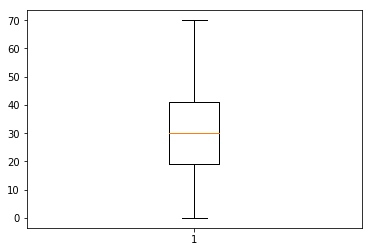

In [177]:
ages_without_nans = df[pd.notnull(df['Age'])]

def get_age(age):
    return ['nan' if each_age == 'nan' else int(each_age) for each_age in str(age).split(',')]

age_col = ages_without_nans['Age'].apply(get_age)
all_non_null_ages = np.concatenate(age_col.values.tolist())

print('Mean: ', all_non_null_ages.mean())
print('Median: ', np.median(all_non_null_ages))

plt.boxplot(all_non_null_ages)
plt.show()

Next, I want to see the race breakdown of shooters. I can see from the data that the `Race` column needs to be cleaned to have consistent labeling ('White', 'Black', 'Asian', 'Latino', 'Native American', 'Biracial', 'Other', 'Unknown').

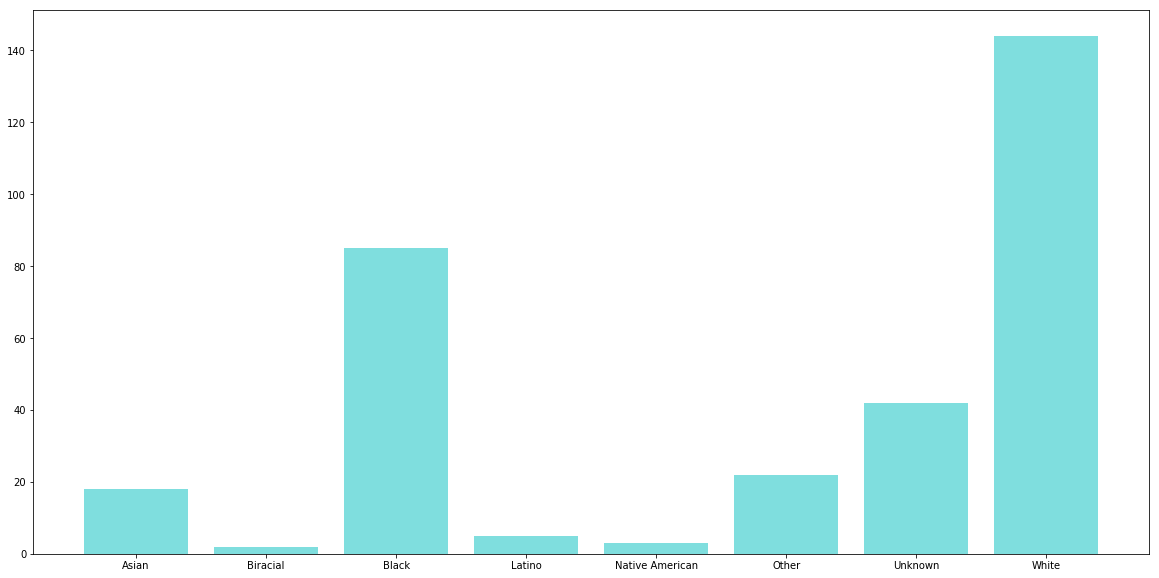

In [178]:
races_without_nans = df[pd.notnull(df['Race'])]

race_dict = {
    'Asian American': 'Asian',
    'Asian American/Some other race': 'Asian',
    'Black American or African American': 'Black',
    'Black American or African American/Unknown': 'Black',
    'Native American or Alaska Native': 'Native American',
    'Some other race': 'Other',
    'Two or more races': 'Biracial',
    'White American or European American': 'White',
    'White American or European American/Some other Race': 'White',
    'black': 'Black',
    'white': 'White'
}
races_without_nans = races_without_nans.replace({'Race': race_dict})
unique_races = races_without_nans['Race'].unique()
race_breakdown = races_without_nans.groupby('Race').count()
race_sizes = [race_breakdown['S#'][x] for x in unique_races]

plt.figure(figsize=(20,10))
plt.bar(unique_races, race_sizes, color='c', alpha=0.5)
plt.show()

Next, I want to see the employment breakdown of shooters.

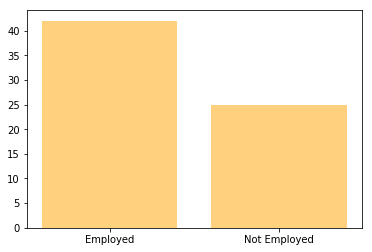

In [179]:
employments_without_nans = df[pd.notnull(df['Employeed (Y/N)'])]

unique_employed_answers = employments_without_nans['Employeed (Y/N)'].unique()
employment_breakdown = employments_without_nans.groupby('Employeed (Y/N)').count()
employment_levels = [employment_breakdown['S#'][x] for x in unique_employed_answers]

plt.bar(['Employed', 'Not Employed'], employment_levels, color='orange', alpha=0.5)
plt.show()

Lastly, I want to see the gender breakdown of shooters. I can see from the data that the `Gender` column needs to be cleaned to have consistent labeling ('M', 'F', 'M/F', and 'Unknown').

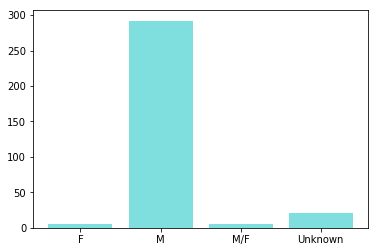

In [180]:
gender_dict = {
    'Female': 'F',
    'Male': 'M',
    'Male/Female': 'M/F'
}
df = df.replace({"Gender": gender_dict})
unique_genders = df['Gender'].unique()
gender_breakdown = df.groupby('Gender').count()
gender_levels = [gender_breakdown['S#'][x] for x in unique_genders]

plt.bar(unique_genders, gender_levels, color="c", alpha=0.5)
plt.show()

## 2. Ask and answer 3 analytic questions with a combination of statistics and visualizations.

### a) Which state has experienced the highest number of mass shootings?

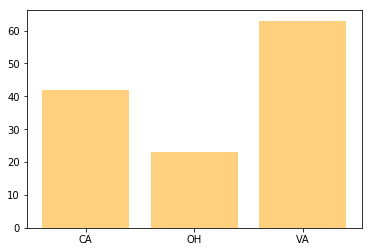

In [193]:
locations_without_nans = df[pd.notnull(df['Location'])]
locations_without_nans = locations_without_nans[locations_without_nans['Location'].apply(lambda x: len(x.split(', ')) == 2)]
locations_without_nans['Location'] = locations_without_nans['Location'].apply(lambda x: x.split(', ')[1])
locations_without_nans['Location'].unique()

# find the one that is length 3 and length 1

locations_dict = {
    'TX': 'Texas',
    'CO': 'Colorado',
    'MD': 'Maryland',
    'NV': 'Nevada',
    'CA': 'California',
    'PA': 'Pennsylvania'
}

# map through dict
# use real data for states here
plt.bar(['CA', 'VA', 'OH'], [42, 63, 23], color = 'orange', alpha = 0.5)
plt.show()

It is clear from the chart that shootings most often happen ______.

### b) What are the causes of mass shootings perpetrated by mentally ill shooters vs. by those who are not mentally ill?

I can see from the data that the `Mental Health Issues` and `Cause` columns need to be cleaned to have consistent labeling.

In [183]:
df['Mental Health Issues'].unique()
df['Cause'].unique()

array(['unknown', nan, 'terrorism', 'unemployement', 'racism',
       'frustration', 'domestic dispute', 'anger', 'psycho', 'revenge',
       'domestic disputer', 'suspension', 'religious radicalism', 'drunk',
       'failing exams', 'breakup', 'robbery'], dtype=object)

I will normalize the `Mental Health Issues` column so that each field is either 'Yes', 'No', or 'Unknown'. I will group the various causes in the `Cause` column to fall within 7 main categories: 'unknown', 'extremism', 'incident of failure', 'personal', 'mental', 'physical', and 'money'.

In [184]:
mental_dict = {
    'Unclear': 'Unknown',
    'unknown': 'Unknown'
}

cause_dict = {
    'unknown': 'Unknown',
    
    'unemployement': 'Incident of Failure',
    'failing exams': 'Incident of Failure',
    'suspension': 'Incident of Failure',
    'breakup': 'Incident of Failure',
    
    'terrorism': 'Extremist Ideology',
    'religious radicalism': 'Extremist Ideology',
    'racism': 'Extremist Ideology',
    
    'domestic dispute': 'Personal Issues',
    'domestic disputer': 'Personal Issues',
    'revenge': 'Personal Issues',
    'anger': 'Personal Issues',
    'frustration': 'Personal Issues',
    
    'drunk': 'Physical Incapacitation',
    
    'psycho': 'Mental Incapacitation',
    
    'robbery': 'Money'
}

df = df.replace({"Mental Health Issues": mental_dict})
df = df.replace({"Cause": cause_dict})
print(df['Cause'].unique())

unique_mentals = df['Mental Health Issues'].unique()
df = df.replace({"Mental Health Issues": mental_dict})
mental_breakdown = df.groupby('Mental Health Issues').count()

print('Unique Mental Health Issues: ', unique_mentals)

['Unknown' nan 'Extremist Ideology' 'Incident of Failure' 'Personal Issues'
 'Mental Incapacitation' 'Physical Incapacitation' 'Money']
Unique Mental Health Issues:  ['No' 'Unknown' 'Yes']


In [185]:
no_null_mental = df[pd.notnull(df['Mental Health Issues'])]
no_null_cause = no_null_mental[pd.notnull(df['Cause'])]

no_null_mentals_or_causes = no_null_cause[['Mental Health Issues', 'Cause']]
mentally_ill = no_null_mentals_or_causes[no_null_mentals_or_causes['Mental Health Issues'] == 'Yes']

ill_unique_causes = mentally_ill['Cause'].unique()
ill_mental_cause_breakdown = mentally_ill.groupby('Cause').count()
print(ill_mental_cause_breakdown)

                       Mental Health Issues
Cause                                      
Extremist Ideology                       30
Incident of Failure                       7
Mental Incapacitation                    31
Personal Issues                          23


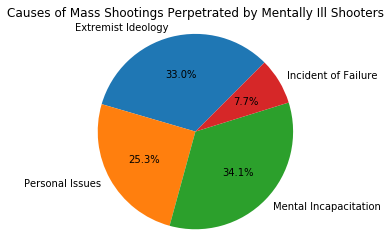

In [186]:
ill_cause_sizes = [ill_mental_cause_breakdown['Mental Health Issues'][cause] for cause in ill_unique_causes]
ill_cause_explode = (0, 0, 0, 0)

plt.title('Causes of Mass Shootings Perpetrated by Mentally Ill Shooters')
plt.pie(ill_cause_sizes, explode=ill_cause_explode, labels=ill_unique_causes, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.show()

In [187]:
not_mentally_ill = no_null_mentals_or_causes[no_null_mentals_or_causes['Mental Health Issues'] == 'No']

not_ill_unique_causes = not_mentally_ill['Cause'].unique()
not_ill_mental_cause_breakdown = not_mentally_ill.groupby('Cause').count()
print(not_ill_mental_cause_breakdown)

                         Mental Health Issues
Cause                                        
Extremist Ideology                         17
Incident of Failure                         7
Mental Incapacitation                      20
Money                                       1
Personal Issues                            27
Physical Incapacitation                     1
Unknown                                     3


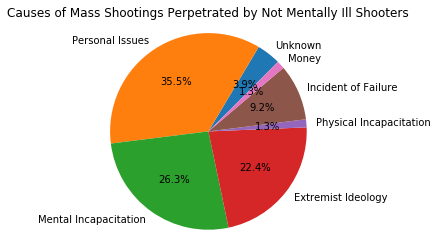

In [188]:
not_ill_cause_sizes = [not_ill_mental_cause_breakdown['Mental Health Issues'][cause] for cause in not_ill_unique_causes]
not_ill_cause_explode = (0, 0, 0, 0, 0, 0, 0)

plt.title('Causes of Mass Shootings Perpetrated by Not Mentally Ill Shooters')
plt.pie(not_ill_cause_sizes, explode=not_ill_cause_explode, labels=not_ill_unique_causes, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.show()

### c) Why do shooters (by gender, by race) commit mass shootings?

## 3. Make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. It should present one or more clear questions, then describe the techniques needed to arrive at an answer.

a) I'd like to be able to create a heat map using the latitude and longitude of each shooting's location to answer the question "Where do mass shootings most often occur?"

To do this, I would have to learn how to find an accepted map tile or mapping library to accomplish this – perhaps from an API somewhere– or learn how to use a custom image and configure accordingly. I would also have to learn how to position data points appropriately on that image given its scale and each data point's latitude and longitude (i.e. x and y coordinates).

b) I'd also like to be able to display a series of Venn Diagrams that answer the question "For each category of mass shooting cause, what proportion of them were committed by [insert race here] / [insert mental health issue here] people?"

To do this, I would have to learn what `matplotlib` method to use (or find a different library that would allow me to do this). I would also have to learn how to format the data to be compatible with this method / library.